# [WIP] Magnetic Field Gradient Simulation

This notebook implements a simulation of the gradient of a magnetic field applied to a population of spins.

In [65]:
from pyMRI.pymri import population_transverse_decay
from pyMRI.utils import rerange
import numpy as np
import matplotlib.pyplot as plt
from typing import Literal

In [66]:
t0 = 0.0
tn = 300.0
dt = 0.001

In [67]:
n = 500

## B gradient

In [68]:
def B_gradient(x : np.ndarray, G : float, type : Literal["linear", "quadratic"]) -> np.ndarray:
    if type == "linear":
        return G*x
    elif type == "quadratic":
        return G*x**2

In [69]:
x_min = -1.0
x_max = 1.0

spins_x = np.random.rand(n)

spins_x = rerange(spins_x, x_min, x_max)

In [70]:
T2s = np.full(n, 500.0) 

phis = np.zeros(n)

echos = np.array([])

In [71]:
B0 = np.full(n, 0.0)
G_x = 0.05
DB = B_gradient(spins_x, G_x, 'linear')
DB_ = B_gradient(spins_x, -G_x, 'linear')

B = B0 + DB
B_ = B0 + DB_

gamma = 10.0

ws0 = gamma*B
ws1 = gamma*B_

In [72]:
S, t = population_transverse_decay(t0, tn, dt, T2s, 1.0, ws0, phis, echos)
S_, t_ = population_transverse_decay(tn, 2*tn, dt, T2s, 1.0, ws1, phis, echos)

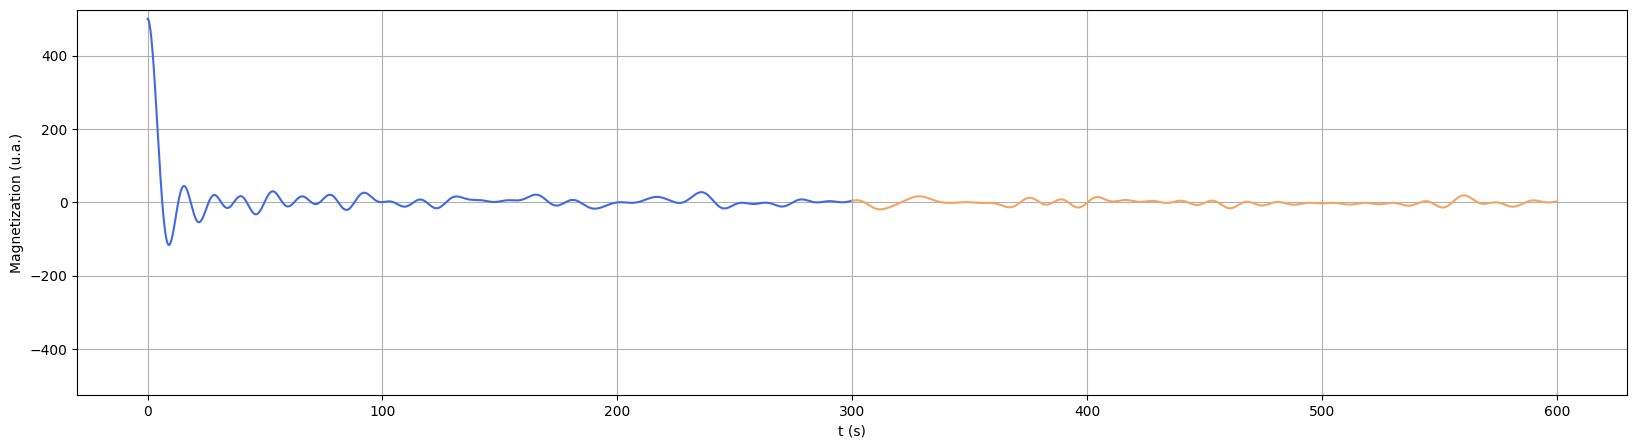

In [73]:
s0, sn = np.where(t == t0)[0][0], np.where(t == tn - dt)[0][0]


plt.figure(figsize=(20, 5))
plt.plot(t, S, c = "royalblue")
plt.plot(t_, S_, c = "sandybrown")
plt.ylim(-n - 0.05*n, n + 0.05*n)
plt.xlabel("t (s)")
plt.ylabel("Magnetization (u.a.)")
plt.grid()